<a href="https://colab.research.google.com/github/smf-9000/kaggle/blob/main/%5B002%5D_tabular_playground_series_jul_2021_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%config Completer.use_jedi = False

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tabular-playground-series-jul-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-jul-2021/train.csv
/kaggle/input/tabular-playground-series-jul-2021/test.csv


In [ ]:
sample_submission_df = pd.read_csv('/kaggle/input/tabular-playground-series-jul-2021/sample_submission.csv')
train_df = pd.read_csv('/kaggle/input/tabular-playground-series-jul-2021/train.csv')
test_df = pd.read_csv('/kaggle/input/tabular-playground-series-jul-2021/test.csv')

In [ ]:
train_df.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


In [ ]:
test_df.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3


In [ ]:
sample_submission_df.head()

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,2.0,10.0,300.0
1,2011-01-01 01:00:00,2.0,10.0,300.0
2,2011-01-01 02:00:00,2.0,10.0,300.0
3,2011-01-01 03:00:00,2.0,10.0,300.0
4,2011-01-01 04:00:00,2.0,10.0,300.0


In [ ]:
date_time_for_submission = test_df['date_time'].values
date_time_for_submission

array(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
       '2011-01-01 02:00:00', ..., '2011-04-04 12:00:00',
       '2011-04-04 13:00:00', '2011-04-04 14:00:00'], dtype=object)

In [ ]:
train_df.isna().sum()

date_time                 0
deg_C                     0
relative_humidity         0
absolute_humidity         0
sensor_1                  0
sensor_2                  0
sensor_3                  0
sensor_4                  0
sensor_5                  0
target_carbon_monoxide    0
target_benzene            0
target_nitrogen_oxides    0
dtype: int64

In [ ]:
test_df.isna().sum()

date_time            0
deg_C                0
relative_humidity    0
absolute_humidity    0
sensor_1             0
sensor_2             0
sensor_3             0
sensor_4             0
sensor_5             0
dtype: int64

In [ ]:
for df in [train_df, test_df]:
    df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')
    d = df['date_time'].dt.dayofweek.values
    w_d = np.zeros((d.size, d.max()+1))
    w_d[np.arange(d.size), d] = 1
    days_df = pd.DataFrame(w_d, columns=['day_0','day_1','day_2','day_3','day_4','day_5','day_6'])
    df[days_df.columns] = days_df
    
    hh = df['date_time'].dt.hour.values
#     df['HH'] = hh
    d_h = np.zeros((hh.size, hh.max()+1))
    d_h[np.arange(hh.size), hh] = 1
    hours_df = pd.DataFrame(d_h, columns=['hour_' + str(i) for i in range(24)])
    df[hours_df.columns] = hours_df
    
    is_night = ((hh >= 21) | (hh <= 7)).astype(int)
    df['is_night'] = is_night

In [ ]:
train_df.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,is_night
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [ ]:
test_df.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,day_0,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,is_night
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
train_df.describe()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,is_night
count,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,...,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000
mean,20.878034,47.561004,1.110309,1091.572100,938.064970,883.903305,1513.238349,998.335565,2.086219,10.237083,...,0.041626,0.041626,0.041626,0.041766,0.041766,0.041766,0.041766,0.041766,0.041766,0.458445
std,7.937917,17.398731,0.398950,218.537554,281.978988,310.456355,350.180310,381.537695,1.447109,7.694426,...,0.199746,0.199746,0.199746,0.200069,0.200069,0.200069,0.200069,0.200069,0.200069,0.498305
min,1.300000,8.900000,0.198800,620.300000,364.000000,310.600000,552.900000,242.700000,0.100000,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.900000,33.700000,0.855900,930.250000,734.900000,681.050000,1320.350000,722.850000,1.000000,4.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.700000,47.300000,1.083500,1060.500000,914.200000,827.800000,1513.100000,928.700000,1.700000,8.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,25.800000,60.800000,1.404150,1215.800000,1124.100000,1008.850000,1720.400000,1224.700000,2.800000,14.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,46.100000,90.800000,2.231000,2088.300000,2302.600000,2567.400000,2913.800000,2594.600000,12.500000,63.700000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test_df.describe()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,day_0,day_1,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,is_night
count,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,...,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000
mean,10.808144,51.031242,0.627053,1106.534490,836.459769,828.321495,1104.850601,1029.851535,0.145527,0.138852,...,0.041389,0.041389,0.041389,0.041389,0.041389,0.041389,0.041389,0.041389,0.041389,0.458834
std,6.444497,16.665047,0.266588,205.341455,272.816585,339.511779,293.112225,434.863287,0.352710,0.345869,...,0.199231,0.199231,0.199231,0.199231,0.199231,0.199231,0.199231,0.199231,0.199231,0.498413
min,-1.800000,9.800000,0.184700,665.900000,356.200000,320.100000,523.400000,218.800000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.600000,36.900000,0.413350,951.500000,640.700000,597.050000,899.450000,688.550000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.800000,50.600000,0.596400,1080.400000,800.800000,757.100000,1076.200000,973.100000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14.200000,63.550000,0.804950,1222.100000,1016.100000,944.950000,1288.350000,1324.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,30.900000,88.800000,1.393000,1882.900000,1776.100000,1975.000000,2211.400000,2593.800000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# i = 0
# for c1 in ['deg_C','relative_humidity','absolute_humidity','sensor_1','sensor_2','sensor_3','sensor_4','sensor_5']:
#     for c2 in ['deg_C','relative_humidity','absolute_humidity','sensor_1','sensor_2','sensor_3','sensor_4','sensor_5']:
#         train_df['featyre_' + str(i)] = train_df[c1] * train_df[c2]
#         test_df['featyre_' + str(i)] = test_df[c1] * test_df[c2]
#         i += 1
#         for c3 in ['deg_C','relative_humidity','absolute_humidity','sensor_1','sensor_2','sensor_3','sensor_4','sensor_5']:
#             train_df['featyre_' + str(i)] = train_df[c1] * train_df[c2]
#             test_df['featyre_' + str(i)] = test_df[c1] * test_df[c2]
#             i += 1

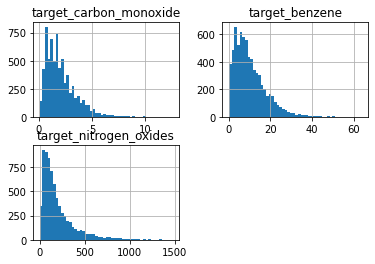

In [ ]:
hist = train_df[['target_carbon_monoxide','target_benzene','target_nitrogen_oxides']].hist(bins=50)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# ################################################################
# fig = plt.figure(figsize = (30,40))
# ax = fig.gca()
# hist = train_df[train_df.columns.values].hist(bins=300, ax = ax)

In [ ]:
train_df.corr()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,is_night
deg_C,1.000000,-0.668002,0.445162,0.017513,0.133167,-0.145437,0.308202,-0.050567,-0.007503,0.109757,...,1.281780e-01,1.336068e-01,1.163183e-01,0.077263,0.040572,0.009540,-0.016718,-0.033740,-0.047396,-0.336194
relative_humidity,-0.668002,1.000000,0.249013,0.093130,-0.035152,-0.102146,0.027002,0.126466,0.016589,-0.022895,...,-1.513443e-01,-1.496324e-01,-1.315989e-01,-0.094807,-0.058644,-0.015435,0.011729,0.031640,0.057055,0.413516
absolute_humidity,0.445162,0.249013,1.000000,0.105977,0.236894,-0.485445,0.567376,0.124945,-0.013756,0.186293,...,-2.758903e-02,-2.689717e-02,-2.313835e-02,-0.011528,-0.004399,0.006163,0.007768,0.009581,0.010743,0.046207
sensor_1,0.017513,0.093130,0.105977,1.000000,0.811898,-0.592233,0.643191,0.860849,0.857215,0.842534,...,8.915143e-03,3.352575e-02,9.585053e-02,0.150324,0.168396,0.120166,0.035174,-0.006410,-0.015653,-0.385851
sensor_2,0.133167,-0.035152,0.236894,0.811898,1.000000,-0.819334,0.812454,0.863464,0.821025,0.964440,...,1.552011e-02,4.347209e-02,1.095767e-01,0.164196,0.176534,0.124761,0.029600,-0.014282,-0.028240,-0.440598
sensor_3,-0.145437,-0.102146,-0.485445,-0.592233,-0.819334,1.000000,-0.741439,-0.706006,-0.547567,-0.735545,...,-5.208283e-03,-1.987844e-02,-5.990258e-02,-0.093456,-0.102660,-0.089775,-0.040254,-0.011455,-0.004869,0.293778
sensor_4,0.308202,0.027002,0.567376,0.643191,0.812454,-0.741439,1.000000,0.641120,0.571412,0.783750,...,-1.166472e-02,3.179510e-03,6.169401e-02,0.114533,0.127378,0.092202,0.010640,-0.017712,-0.027012,-0.284801
sensor_5,-0.050567,0.126466,0.124945,0.860849,0.863464,-0.706006,0.641120,1.000000,0.834501,0.877662,...,-4.546268e-02,-2.248748e-02,4.328083e-02,0.103962,0.131786,0.108859,0.039439,0.007307,-0.002232,-0.278994
target_carbon_monoxide,-0.007503,0.016589,-0.013756,0.857215,0.821025,-0.547567,0.571412,0.834501,1.000000,0.881884,...,-7.795277e-03,2.169121e-02,1.194443e-01,0.196208,0.225598,0.166817,0.038423,-0.024196,-0.033620,-0.436329
target_benzene,0.109757,-0.022895,0.186293,0.842534,0.964440,-0.735545,0.783750,0.877662,0.881884,1.000000,...,3.003710e-03,3.039309e-02,1.142176e-01,0.181493,0.196166,0.122783,0.010670,-0.032947,-0.046250,-0.436048


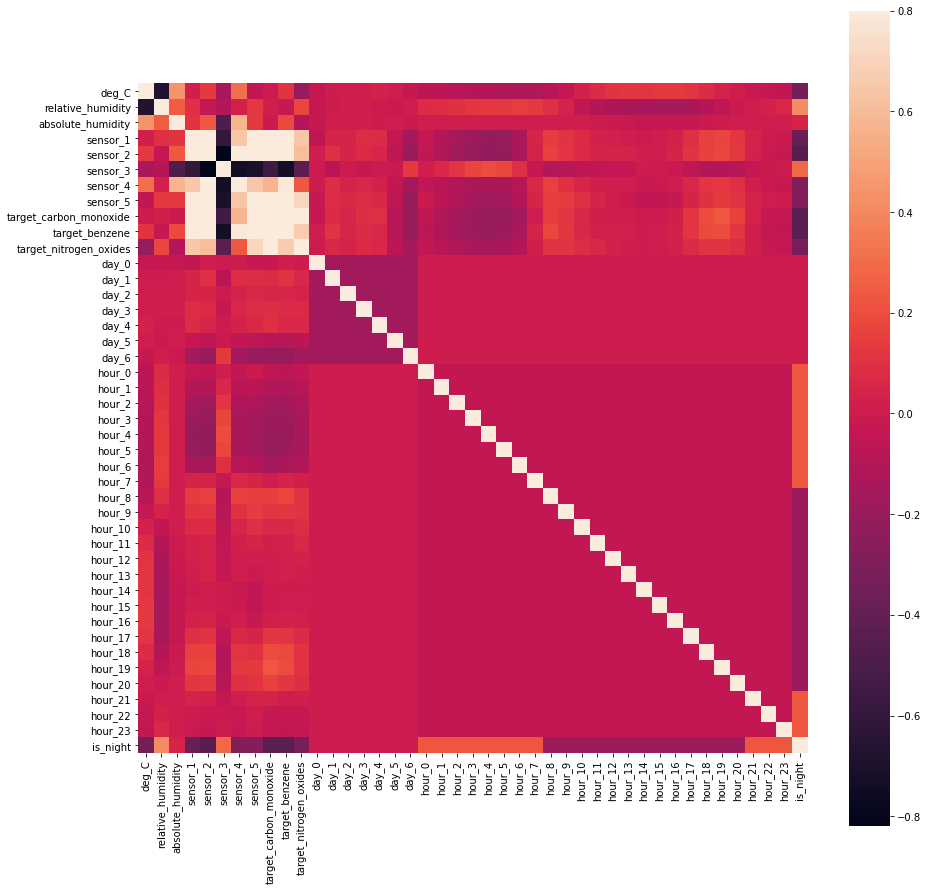

In [ ]:
import seaborn as sns
corr = train_df.corr()
fig = plt.figure(figsize = (15,15))
sns.heatmap(corr, vmax = .8, square = True)
plt.show()

In [ ]:
tmp_df = train_df[(train_df['absolute_humidity'] <= 0.25 )]['absolute_humidity'] #  | (train_df[col] >= Q3+whis*IQR)
print(tmp_df.size)
idcs = tmp_df.index.values
# print(idcs)
train_df = train_df.drop(idcs)

236


In [ ]:
# ################################################################
# fig = plt.figure(figsize = (30,40))
# ax = fig.gca()
# hist = train_df[train_df.columns.values].hist(bins=300, ax = ax)

In [ ]:
train_df.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
# scaler = preprocessing.MaxAbsScaler()
# scaler = preprocessing.StandardScaler()
for df in [train_df, test_df]:
    for c in df.columns:
        if c not in ['target_carbon_monoxide','target_benzene','target_nitrogen_oxides','date_time']:
            df[[c]] = scaler.fit_transform(df[[c]])

In [ ]:
train_df.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,is_night
0,2010-03-10 18:00:00,0.263393,0.452991,0.253093,0.522411,0.371677,0.330291,0.480087,0.446745,2.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010-03-10 19:00:00,0.265625,0.444444,0.236717,0.448774,0.268439,0.392990,0.350042,0.326630,2.1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2010-03-10 20:00:00,0.252232,0.577534,0.249240,0.484741,0.289852,0.332152,0.410514,0.371742,2.2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2010-03-10 21:00:00,0.216518,0.653236,0.267745,0.477316,0.289542,0.351072,0.388492,0.433905,2.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2010-03-10 22:00:00,0.236607,0.611722,0.268810,0.443937,0.250078,0.385635,0.334769,0.378205,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
test_df.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,day_0,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,is_night
0,2011-01-01 00:00:00,0.299694,0.398734,0.209220,0.363928,0.274315,0.288235,0.211256,0.443916,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2011-01-01 01:00:00,0.211009,0.530380,0.224861,0.479540,0.358265,0.222249,0.266232,0.629558,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2011-01-01 02:00:00,0.232416,0.527848,0.235206,0.358833,0.367491,0.225754,0.247927,0.455579,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2011-01-01 03:00:00,0.207951,0.537975,0.235538,0.389318,0.394394,0.245030,0.288863,0.448084,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2011-01-01 04:00:00,0.192661,0.603797,0.231979,0.292933,0.339672,0.333192,0.262796,0.388842,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# list(test_df.columns.values)

In [ ]:
X, y = train_df[list(test_df.columns.values)[1:]].values, train_df[['target_carbon_monoxide','target_benzene','target_nitrogen_oxides']].values
test_X = test_df.iloc[:,1:].values   # 'target_carbon_monoxide','target_benzene','target_nitrogen_oxides'

In [ ]:
test_X

array([[0.29969419, 0.39873418, 0.20921956, ..., 0.        , 0.        ,
        1.        ],
       [0.21100917, 0.53037975, 0.22486138, ..., 0.        , 0.        ,
        1.        ],
       [0.2324159 , 0.5278481 , 0.23520649, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.86850153, 0.1164557 , 0.37730696, ..., 0.        , 0.        ,
        0.        ],
       [0.94495413, 0.03670886, 0.2724489 , ..., 0.        , 0.        ,
        0.        ],
       [0.90825688, 0.04683544, 0.26326243, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
y

array([[  2.5,  12. , 167.7],
       [  2.1,   9.9,  98.9],
       [  2.2,   9.2, 127.1],
       ...,
       [  1.6,   5.2, 227.4],
       [  1.5,   4.6, 199.8],
       [  1.4,   4.1, 186.5]])

In [ ]:
train_X = np.array(X)
train_y = np.array(y)

### NET

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
def NET(input_shape=(40), out=3):
    
    x_input = layers.Input(shape=input_shape)
    
    X = layers.Dense(128)(x_input)
    X = layers.BatchNormalization()(X)
    X = layers.Activation('relu')(X)
    X = layers.Dense(128)(X)
    X = layers.BatchNormalization()(X)
    X = layers.Activation('relu')(X)
    
    X = layers.Dense(out, activation='relu')(X)
    
    a, b, c = layers.Lambda(tf.unstack, arguments=dict(axis=-1))(X)
    model = models.Model(inputs = x_input, outputs = [a, b, c], name='TABULAR_NET')
    
    return model

In [ ]:
model = NET()

In [ ]:
model.summary()

Model: "TABULAR_NET"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 40)]              0         
_________________________________________________________________
dense (Dense)                (None, 128)               5248      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               

In [ ]:
from tensorflow.keras import backend as K

def root_mean_squared_log_error(y_true, y_pred):
    msle = tf.keras.losses.MeanSquaredLogarithmicError()
    return K.sqrt(msle(y_true, y_pred)) 

In [ ]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss = root_mean_squared_log_error,
              metrics = [root_mean_squared_log_error])

In [ ]:
history = model.fit(
    train_X,
    tf.unstack(train_y, axis=-1),
    epochs = 30,
    shuffle = True,
#     validation_split = 0.2,
    batch_size = 8,)

Epoch 1/30
860/860 [==============================] - 4s 2ms/step - loss: 6.6542 - lambda_loss: 0.6852 - lambda_1_loss: 1.5528 - lambda_2_loss: 4.4162 - lambda_root_mean_squared_log_error: 0.6852 - lambda_1_root_mean_squared_log_error: 1.5528 - lambda_2_root_mean_squared_log_error: 4.4162
Epoch 2/30
860/860 [==============================] - 2s 2ms/step - loss: 3.8197 - lambda_loss: 0.2538 - lambda_1_loss: 0.5060 - lambda_2_loss: 3.0600 - lambda_root_mean_squared_log_error: 0.2538 - lambda_1_root_mean_squared_log_error: 0.5060 - lambda_2_root_mean_squared_log_error: 3.0600
Epoch 3/30
860/860 [==============================] - 2s 2ms/step - loss: 3.0327 - lambda_loss: 0.2340 - lambda_1_loss: 0.3086 - lambda_2_loss: 2.4901 - lambda_root_mean_squared_log_error: 0.2340 - lambda_1_root_mean_squared_log_error: 0.3086 - lambda_2_root_mean_squared_log_error: 2.4901
Epoch 4/30
860/860 [==============================] - 2s 2ms/step - loss: 2.5892 - lambda_loss: 0.2261 - lambda_1_loss: 0.2756 - l

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow, imread

In [ ]:
output = model(test_X)

In [ ]:
date_time_for_submission
submission = pd.DataFrame(date_time_for_submission, columns=['date_time'])
submission['target_carbon_monoxide'] = np.array(output)[0]
submission['target_benzene'] = np.array(output)[1]
submission['target_nitrogen_oxides'] = np.array(output)[2]
submission.head()

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,1.995045,9.080987,213.335831
1,2011-01-01 01:00:00,3.166093,12.970252,321.387451
2,2011-01-01 02:00:00,2.838944,10.770444,271.076721
3,2011-01-01 03:00:00,2.726925,11.293341,263.618774
4,2011-01-01 04:00:00,1.912384,7.289404,184.476776


In [ ]:
submission.to_csv('submission.csv', index=False)

In [ ]:
test = pd.read_csv('submission.csv')
test

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,1.995045,9.080987,213.33583
1,2011-01-01 01:00:00,3.166093,12.970252,321.38745
2,2011-01-01 02:00:00,2.838944,10.770444,271.07672
3,2011-01-01 03:00:00,2.726925,11.293341,263.61877
4,2011-01-01 04:00:00,1.912384,7.289404,184.47678
...,...,...,...,...
2242,2011-04-04 10:00:00,3.677093,21.427298,315.44880
2243,2011-04-04 11:00:00,2.586129,16.273499,237.63036
2244,2011-04-04 12:00:00,3.074661,18.188858,232.21658
2245,2011-04-04 13:00:00,2.183543,13.789678,172.07321
